# Count of each hospital


/tmp/ipykernel_4010659/3830076530.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(all_pixel_densities, shade=True, color='b')


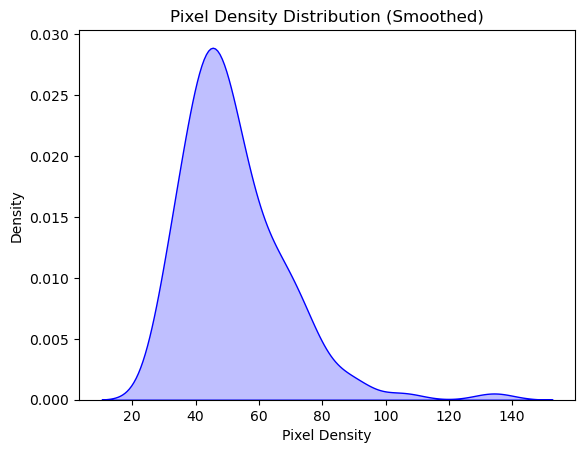

In [1]:
import pandas as pd
import SimpleITK as sitk
import matplotlib.pyplot as plt

# 读取CSV文件
csv_file_path = "/local/data1/honzh073/local_repository/FL/code/3_single_hospital/hospital18.csv"  # 请替换为实际的CSV文件路径
import pandas as pd
import SimpleITK as sitk
import seaborn as sns
import matplotlib.pyplot as plt

# 读取CSV文件
# csv_file_path = "path/to/your/csv_file.csv"  # 请替换为实际的CSV文件路径
data = pd.read_csv(csv_file_path)

# 收集所有图片的像素密度数据
all_pixel_densities = []

for index, row in data.iterrows():
    image_path = row["ImagePath"]  # 图像路径列的名称，请根据实际情况修改
    
    # 读取图像
    image = sitk.ReadImage(image_path)
    image_array = sitk.GetArrayFromImage(image)
    
    # 计算像素密度（平均像素值）并添加到列表中
    pixel_density = image_array.mean()
    all_pixel_densities.append(pixel_density)

# 使用核密度估计绘制平滑曲线
sns.kdeplot(all_pixel_densities, shade=True, color='b')
plt.xlabel('Pixel Density')
plt.ylabel('Density')
plt.title('Pixel Density Distribution (Smoothed)')
plt.show()




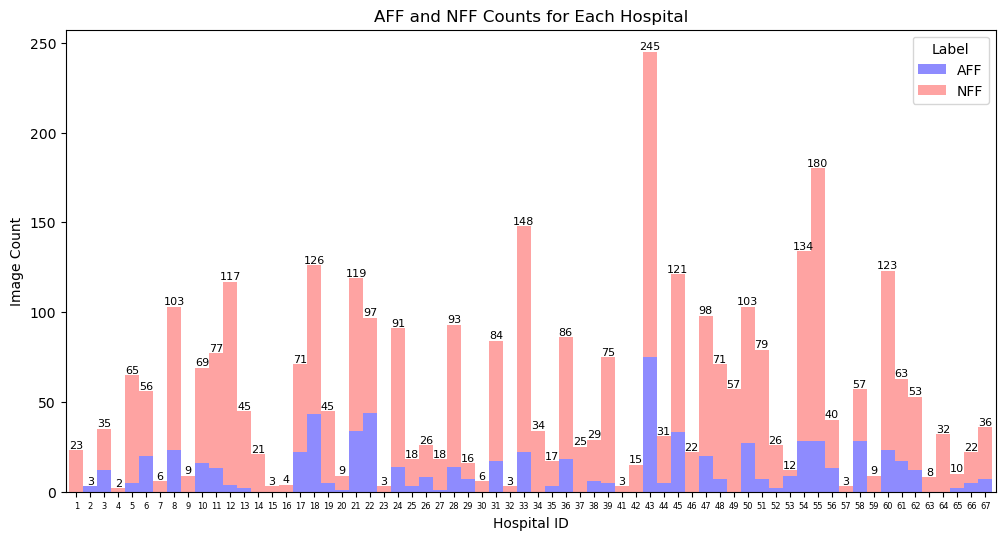

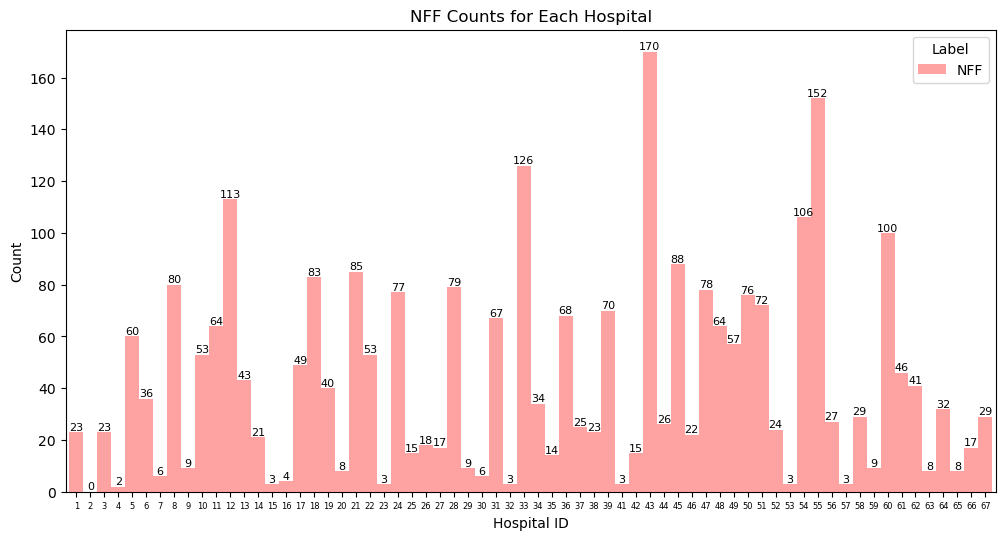

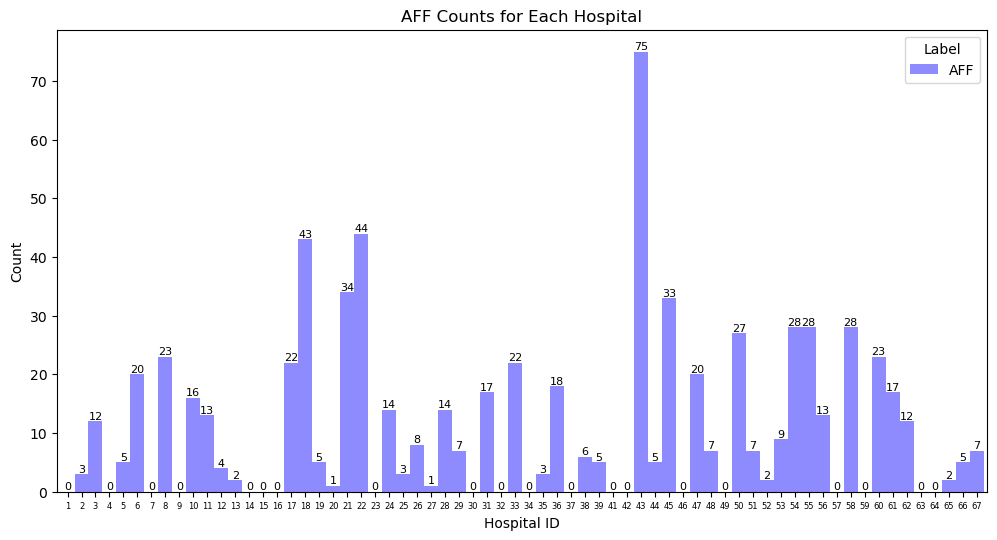

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# read csv
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
data = pd.read_csv(file_path)

# filter HospitalID 100
filtered_data = data[data['HospitalID'] != 100]

# group by hospital ID, count
hospital_label_counts = filtered_data.groupby(['HospitalID', 'Label']).size().unstack().fillna(0)
#-------------------------------------------------------------------------------------------------
# total count
# hospital_label_counts = hospital_label_counts[['NFF', 'AFF']]

hospital_label_counts['Total'] = hospital_label_counts['AFF'] + hospital_label_counts['NFF']

colors = ['#8E8BFE','#FEA3A2']

width = 1
# barchat

ax = hospital_label_counts[['AFF', 'NFF']].plot(kind='bar', stacked=True, figsize=(12, 6),color=colors,width=width)

plt.xlabel('Hospital ID')
plt.ylabel('Image Count')
plt.title('AFF and NFF Counts for Each Hospital')
plt.xticks(rotation=0, fontsize=6)  #  x-label font size
plt.legend(title='Label')

# show AFF NFF count in bar，set font size
for idx, (aff, nff, total) in enumerate(zip(hospital_label_counts['AFF'], hospital_label_counts['NFF'], hospital_label_counts['Total'])):
    ax.text(idx, total, int(total), ha='center', va='bottom', fontsize=8)  # show total count

plt.show()
#-------------------------------------------------------------------------------------------------
hospital_label_counts['Total'] = hospital_label_counts['NFF']

colors = ['#FEA3A2']

# barchat
ax = hospital_label_counts[['NFF']].plot(kind='bar', stacked=True, figsize=(12, 6), color=colors,width=width)
plt.xlabel('Hospital ID')
plt.ylabel('Count')
plt.title('NFF Counts for Each Hospital')
plt.xticks(rotation=0, fontsize=6)  #  x-label font size
plt.legend(title='Label')

# show AFF NFF count in bar，set font size
for idx, (aff, nff, total) in enumerate(zip(hospital_label_counts['AFF'], hospital_label_counts['NFF'], hospital_label_counts['Total'])):
    ax.text(idx, total, int(total), ha='center', va='bottom', fontsize=8)  # show total count

plt.show()
#-------------------------------------------------------------------------------------------------
# total count
hospital_label_counts['Total'] = hospital_label_counts['AFF']
colors = ['#8E8BFE']


# barchat
ax = hospital_label_counts[['AFF']].plot(kind='bar', stacked=True, figsize=(12, 6),color=colors,width=width)
plt.xlabel('Hospital ID')
plt.ylabel('Count')
plt.title('AFF Counts for Each Hospital')
plt.xticks(rotation=0, fontsize=6)  #  x-label font size
plt.legend(title='Label')

# show AFF NFF count in bar，set font size
for idx, (aff, nff, total) in enumerate(zip(hospital_label_counts['AFF'], hospital_label_counts['NFF'], hospital_label_counts['Total'])):
    ax.text(idx, total, int(total), ha='center', va='bottom', fontsize=8)  # show total count

plt.show()


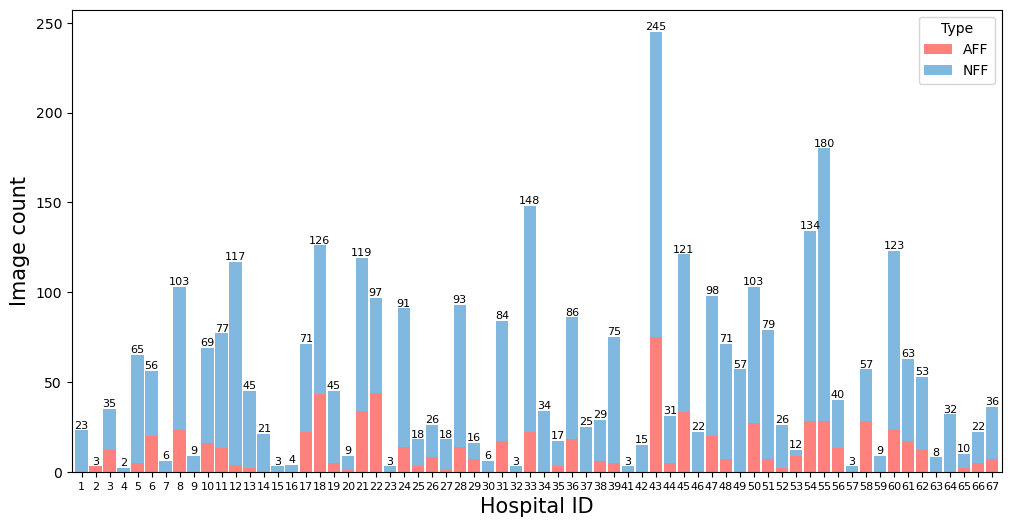

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# read csv
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
data = pd.read_csv(file_path)

# filter HospitalID 100
filtered_data = data[data['HospitalID'] != 100]

# group by hospital ID, count
hospital_label_counts = filtered_data.groupby(['HospitalID', 'Label']).size().unstack().fillna(0)
hospital_label_counts['Total'] = hospital_label_counts['AFF'] + hospital_label_counts['NFF']

colors = [(254/255, 129/255, 125/255), (129/255, 184/255, 223/255)]
# colors = ['#8E8BFE','#FEA3A2']
# 其余代码保持不变
width = 0.9

# barchart
fig, ax = plt.subplots(figsize=(12, 6))
hospital_label_counts[['AFF', 'NFF']].plot(kind='bar', stacked=True, ax=ax, color=colors, width=width)

plt.xlabel('Hospital ID', fontsize=15)
plt.ylabel('Image count', fontsize=15)
# plt.title('AFF and NFF Counts for Each Hospital', fontsize=12)
plt.xticks(rotation=0, fontsize=8)  # x-label font size
plt.yticks(fontsize=10)  # y-label font size
plt.legend(title='Type', fontsize=10)

# show AFF NFF count in bar, set font size
for idx, (aff, nff, total) in enumerate(zip(hospital_label_counts['AFF'], hospital_label_counts['NFF'], hospital_label_counts['Total'])):
    ax.text(idx, total, int(total), ha='center', va='bottom', fontsize=8)  # show total count

# Set transparent background
plt.gcf().set_facecolor('None')
ax.set_facecolor('None')

# Hide grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.show()


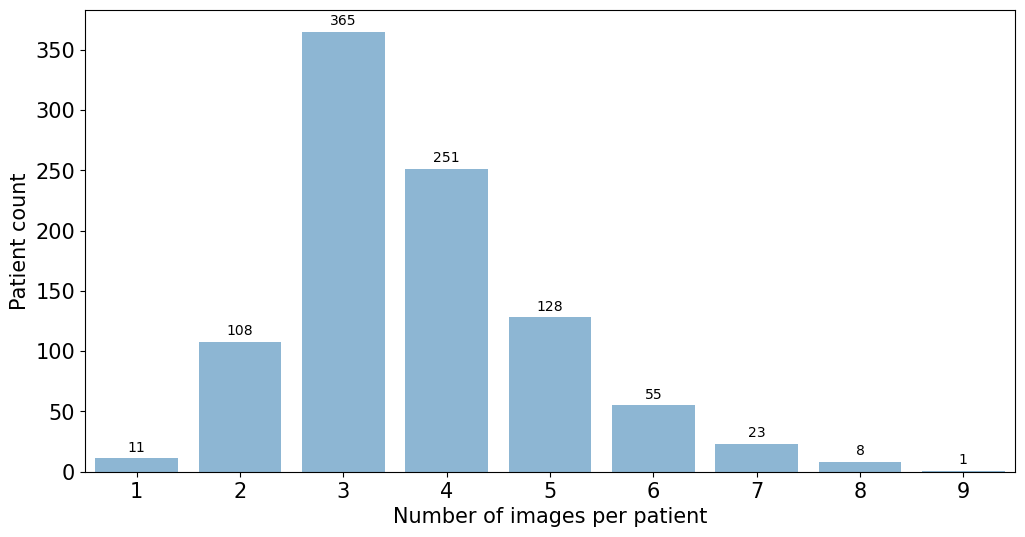

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
data = pd.read_csv(file_path)
data = data[data['HospitalID'] != 100]


# 按PatientID分组并计算每个患者的图片数量
patient_image_counts = data.groupby('PatientID').size().reset_index(name='Image Count')

# 绘制柱形图，并取消不同颜色
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Image Count', data=patient_image_counts, color=(129/255, 184/255, 223/255))

# 在每个柱形上显示患者数量
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.xlabel('Number of images per patient', fontsize=15)
plt.ylabel('Patient count',fontsize=15)
# plt.title('Distribution of Number of Images per Patient')
plt.xticks(rotation=0, fontsize=15)  # x-label font size
plt.yticks(fontsize=15)  # y-label font size
plt.show()


In [82]:
import pandas as pd

# 读取数据
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
data = pd.read_csv(file_path)
data = data[data['HospitalID'] != 100]

# 分别统计 AFF 和 NFF 的数量
aff_data = data[data['Label'] == 'AFF']
nff_data = data[data['Label'] == 'NFF']

# 统计 AFF 和 NFF 的数量
aff_count = aff_data.shape[0]
nff_count = nff_data.shape[0]


# 统计医院数量
total_hospitals = data['HospitalID'].nunique()

# 打印结果
print("总医院数量:", total_hospitals)

# 打印结果
print("AFF数量:", aff_count)
print("NFF数量:", nff_count)

aff_unique_patients = aff_data['PatientID'].nunique()
nff_unique_patients = nff_data['PatientID'].nunique()

# 打印结果
print("AFF唯一患者数量:", aff_unique_patients)
print("NFF唯一患者数量:", nff_unique_patients)



总医院数量: 66
AFF数量: 713
NFF数量: 2817
AFF唯一患者数量: 206
NFF唯一患者数量: 744


In [86]:
import pandas as pd

# 读取数据
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
data = pd.read_csv(file_path)
data = data[data['HospitalID'] != 100]

# 分别统计 AFF 和 NFF 的数量
aff_data = data[data['Label'] == 'AFF']
nff_data = data[data['Label'] == 'NFF']

# 统计 AFF 和 NFF 的数量
aff_count = aff_data.shape[0]
nff_count = nff_data.shape[0]

# 统计医院数量
total_hospitals = data['HospitalID'].nunique()

# 计算 AFF 和 NFF 的医院层面统计信息
aff_hospital_stats = aff_data.groupby('HospitalID').size().describe()
nff_hospital_stats = nff_data.groupby('HospitalID').size().describe()

# 打印 AFF 统计信息
print("AFF数量:", aff_count)
print("AFF医院层面统计信息:")
print(aff_hospital_stats)

# 打印 NFF 统计信息
print("\nNFF数量:", nff_count)
print("NFF医院层面统计信息:")
print(nff_hospital_stats)


AFF数量: 713
AFF医院层面统计信息:
count    46.000000
mean     15.500000
std      14.333721
min       1.000000
25%       5.000000
50%      12.500000
75%      22.000000
max      75.000000
dtype: float64

NFF数量: 2817
NFF医院层面统计信息:
count     65.000000
mean      43.338462
std       38.323572
min        2.000000
25%       14.000000
50%       29.000000
75%       68.000000
max      170.000000
dtype: float64


In [88]:
import pandas as pd

# 读取数据
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
data = pd.read_csv(file_path)
data = data[data['HospitalID'] != 100]

# 分别统计 AFF 和 NFF 的数量
aff_data = data[data['Label'] == 'AFF']
nff_data = data[data['Label'] == 'NFF']

# 统计 AFF 和 NFF 的数量
aff_count = aff_data.shape[0]
nff_count = nff_data.shape[0]

# 统计医院数量
total_hospitals = data['PatientID'].nunique()

# 计算 AFF 和 NFF 的医院层面统计信息
aff_hospital_stats = aff_data.groupby('PatientID').size().describe()
nff_hospital_stats = nff_data.groupby('PatientID').size().describe()

# 打印 AFF 统计信息
# print("AFF数量:", aff_count)
print("AFF医院层面统计信息:")
print(aff_hospital_stats)

# 打印 NFF 统计信息
# print("\nNFF数量:", nff_count)
print("NFF医院层面统计信息:")
print(nff_hospital_stats)


AFF医院层面统计信息:
count    206.000000
mean       3.461165
std        1.093639
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        8.000000
dtype: float64
NFF医院层面统计信息:
count    744.000000
mean       3.786290
std        1.304831
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        9.000000
dtype: float64


In [84]:
import pandas as pd

# 读取数据
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
data = pd.read_csv(file_path)
data = data[data['HospitalID'] != 100]

# 分别统计 AFF 和 NFF 的数量
aff_data = data[data['Label'] == 'AFF']
nff_data = data[data['Label'] == 'NFF']

# 统计 AFF 和 NFF 的数量
aff_count = aff_data.shape[0]
nff_count = nff_data.shape[0]

# 统计医院数量
total_hospitals = data['HospitalID'].nunique()

# 计算 AFF 和 NFF 的医院层面统计信息
aff_hospital_stats = aff_data.groupby('HospitalID').size().describe()
nff_hospital_stats = nff_data.groupby('HospitalID').size().describe()

# 计算平均 AFF 和 NFF 数量
avg_aff_per_hospital = aff_hospital_stats['mean']
avg_nff_per_hospital = nff_hospital_stats['mean']

# 打印 AFF 统计信息
print("AFF数量:", aff_count)
print("AFF医院层面统计信息:")
print(aff_hospital_stats)
print("平均 AFF 数量每家医院:", avg_aff_per_hospital)

# 打印 NFF 统计信息
print("\nNFF数量:", nff_count)
print("NFF医院层面统计信息:")
print(nff_hospital_stats)
print("平均 NFF 数量每家医院:", avg_nff_per_hospital)


AFF数量: 713
AFF医院层面统计信息:
count    46.000000
mean     15.500000
std      14.333721
min       1.000000
25%       5.000000
50%      12.500000
75%      22.000000
max      75.000000
dtype: float64
平均 AFF 数量每家医院: 15.5

NFF数量: 2817
NFF医院层面统计信息:
count     65.000000
mean      43.338462
std       38.323572
min        2.000000
25%       14.000000
50%       29.000000
75%       68.000000
max      170.000000
dtype: float64
平均 NFF 数量每家医院: 43.33846153846154


In [65]:
import pandas as pd

# 读取数据
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
data = pd.read_csv(file_path)

# 过滤掉HospitalID为100的数据
filtered_data = data[data['HospitalID'] != 100]

# 医院层面的统计量
hospital_stats = filtered_data.groupby('HospitalID')['Label'].describe()

# AFF图片数量的统计量
aff_stats = filtered_data[filtered_data['Label'] == 'AFF']['HospitalID'].describe()

# NFF图片数量的统计量
nff_stats = filtered_data[filtered_data['Label'] == 'NFF']['HospitalID'].describe()

# 打印结果
print("\n医院层面统计量:\n", hospital_stats)
print("\nAFF图片数量统计量:\n", aff_stats)
print("\nNFF图片数量统计量:\n", nff_stats)



医院层面统计量:
            count unique  top freq
HospitalID                       
1             23      1  NFF   23
2              3      1  AFF    3
3             35      2  NFF   23
4              2      1  NFF    2
5             65      2  NFF   60
...          ...    ...  ...  ...
63             8      1  NFF    8
64            32      1  NFF   32
65            10      2  NFF    8
66            22      2  NFF   17
67            36      2  NFF   29

[66 rows x 4 columns]

AFF图片数量统计量:
 count    713.000000
mean      35.555400
std       17.874408
min        2.000000
25%       21.000000
50%       38.000000
75%       51.000000
max       67.000000
Name: HospitalID, dtype: float64

NFF图片数量统计量:
 count    2817.000000
mean       35.501952
std        17.984509
min         1.000000
25%        19.000000
50%        37.000000
75%        51.000000
max        67.000000
Name: HospitalID, dtype: float64


In [78]:
import pandas as pd

# 读取过滤后的数据
filtered_data = pd.read_csv('/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/filtered_data.csv')

# 统计医院数量
hospital_count = filtered_data['HospitalID'].nunique()

# 统计AFF和NFF图片数量
aff_image_count = filtered_data[filtered_data['Label'] == 'AFF'].nunique()
nff_image_count = filtered_data[filtered_data['Label'] == 'NFF'].nunique()

# 统计AFF和NFF患者数量
aff_patient_count = filtered_data[filtered_data['Label'] == 'AFF']['PatientID'].nunique()
nff_patient_count = filtered_data[filtered_data['Label'] == 'NFF']['PatientID'].nunique()

# 打印结果
# print("医院数量:", hospital_count)
print("AFF图片数量:", aff_image_count)
print("NFF图片数量:", nff_image_count)
print("AFF患者数量:", aff_patient_count)
print("NFF患者数量:", nff_patient_count)


AFF图片数量: HospitalID     46
PatientID     206
ImageID         8
ImagePath     713
Label           1
dtype: int64
NFF图片数量: HospitalID      65
PatientID      744
ImageID          9
ImagePath     2817
Label            1
dtype: int64
AFF患者数量: 206
NFF患者数量: 744


In [75]:
import pandas as pd

# 读取数据
file_path = '/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/raw_imagePath.csv'
data = pd.read_csv(file_path)

# 过滤掉 HospitalID 为 100 的数据
filtered_data = data[data['HospitalID'] != 100]

# 打印过滤后的数据
print(filtered_data)
# 保存过滤后的数据
filtered_data.to_csv('/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/filtered_data.csv', index=False)


      HospitalID   PatientID ImageID  \
0             55  ABEFSLVKVT   1.png   
1             55  ABEFSLVKVT   2.png   
2             55  ABEFSLVKVT   3.png   
3             55  ABEFSLVKVT   4.png   
4             12  ABGDQMCLXO   1.png   
...          ...         ...     ...   
4335          61  ZYQNJTUABI   3.png   
4336          46  ZZHIZUUQVL   1.png   
4337          46  ZZHIZUUQVL   2.png   
4338          46  ZZHIZUUQVL   3.png   
4339          46  ZZHIZUUQVL   4.png   

                                              ImagePath Label  
0     /local/data1/honzh073/data/8bit_raw/patient_AB...   NFF  
1     /local/data1/honzh073/data/8bit_raw/patient_AB...   NFF  
2     /local/data1/honzh073/data/8bit_raw/patient_AB...   NFF  
3     /local/data1/honzh073/data/8bit_raw/patient_AB...   NFF  
4     /local/data1/honzh073/data/8bit_raw/patient_AB...   NFF  
...                                                 ...   ...  
4335  /local/data1/honzh073/data/8bit_raw/patient_ZY...   NFF  
4336  /

In [60]:
import pandas as pd

# 读取包含图像、患者和医院信息的数据
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
data = pd.read_csv(file_path)

# 图像层面的统计量
image_stats = data.groupby('ImageID')['Label'].agg(['count', 'nunique', 'unique'])

# 患者层面的统计量
patient_stats = data.groupby('PatientID')['Label'].agg(['count', 'nunique', 'unique'])

# 医院层面的统计量
hospital_stats = data.groupby('HospitalID')['Label'].agg(['count', 'nunique', 'unique'])

# 打印结果
print("图像层面统计量\n", image_stats)
print("\n患者层面统计量\n", patient_stats)
print("\n医院层面统计量\n", hospital_stats)


图像层面统计量
          count  nunique      unique
ImageID                            
1.png     1163        2  [NFF, AFF]
2.png     1155        2  [NFF, AFF]
3.png     1016        2  [NFF, AFF]
4.png      580        2  [NFF, AFF]
5.png      274        2  [NFF, AFF]
6.png      104        2  [NFF, AFF]
7.png       38        2  [NFF, AFF]
8.png       10        2  [NFF, AFF]
9.png        2        1       [NFF]

患者层面统计量
             count  nunique unique
PatientID                        
ABEFSLVKVT      4        1  [NFF]
ABGDQMCLXO      3        1  [NFF]
ABNYPPQXFX      3        1  [NFF]
ABXXVXRUSF      3        1  [NFF]
ABYNJJDDJI      6        1  [NFF]
...           ...      ...    ...
ZXWUOKDRWH      4        1  [NFF]
ZYKAOFFICT      5        1  [NFF]
ZYQNJTUABI      3        1  [NFF]
ZZHIZUUQVL      4        1  [NFF]
ZZRSINHSUC      2        1  [NFF]

[1163 rows x 3 columns]

医院层面统计量
             count  nunique      unique
HospitalID                            
1              23        1    

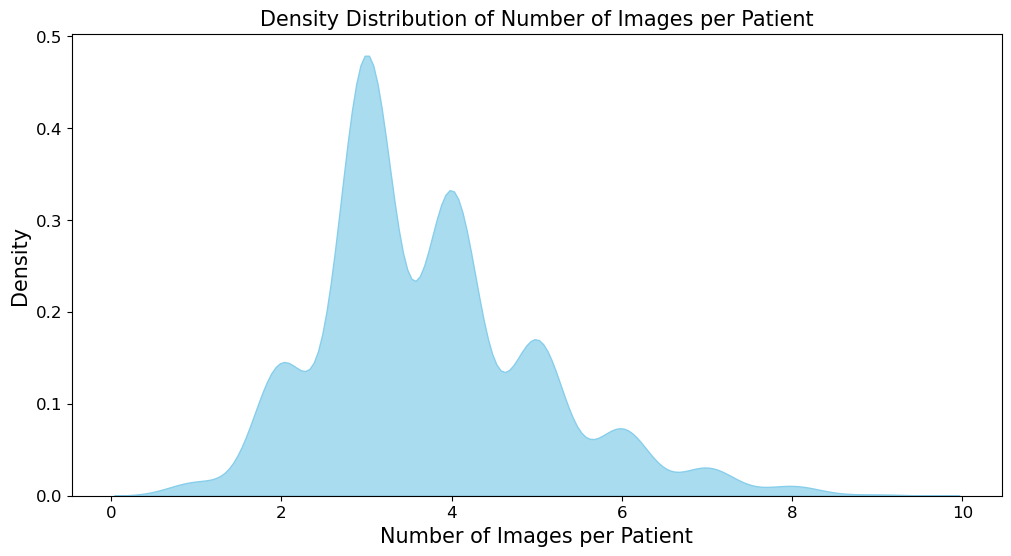

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
data = pd.read_csv(file_path)

# 过滤掉HospitalID为100的数据
data = data[data['HospitalID'] != 100]

# 按PatientID分组并计算每个患者的图片数量
patient_image_counts = data.groupby('PatientID').size().reset_index(name='Image Count')

# 使用Seaborn绘制核密度估计曲线
plt.figure(figsize=(12, 6))
sns.kdeplot(patient_image_counts['Image Count'], fill=True, color='skyblue', alpha=0.7)

plt.xlabel('Number of Images per Patient', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('Density Distribution of Number of Images per Patient', fontsize=15)
plt.xticks(fontsize=12)  # x-label font size
plt.yticks(fontsize=12)  # y-label font size
plt.show()


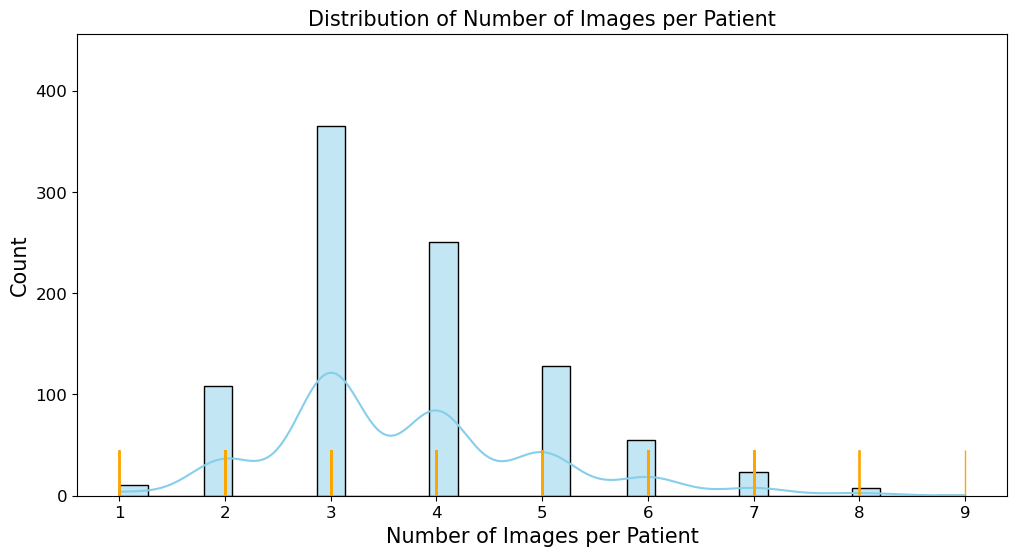

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
data = pd.read_csv(file_path)

# 过滤掉HospitalID为100的数据
data = data[data['HospitalID'] != 100]

# 按PatientID分组并计算每个患者的图片数量
patient_image_counts = data.groupby('PatientID').size().reset_index(name='Image Count')

# 使用Seaborn绘制带有核密度估计和数据点的直方图
plt.figure(figsize=(12, 6))
sns.histplot(patient_image_counts['Image Count'], kde=True, bins=30, color='skyblue')

# 添加rugplot
sns.rugplot(patient_image_counts['Image Count'], color='orange', height=0.1)

plt.xlabel('Number of Images per Patient', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of Number of Images per Patient', fontsize=15)
plt.xticks(fontsize=12)  # x-label font size
plt.yticks(fontsize=12)  # y-label font size
plt.show()


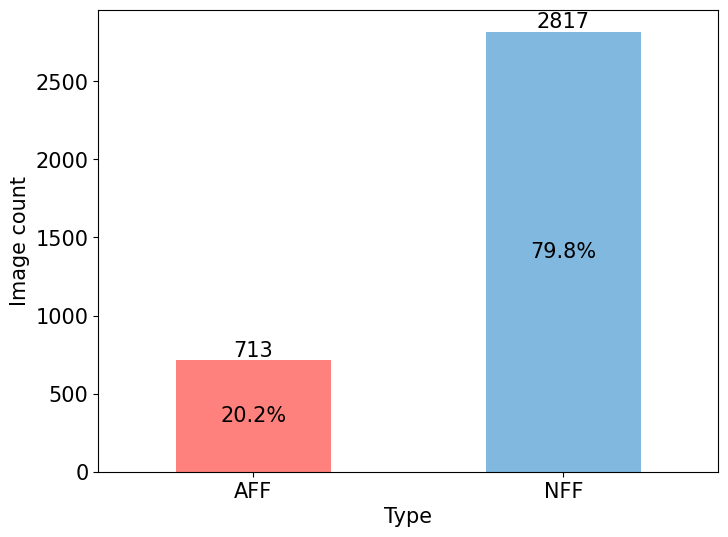

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
data = pd.read_csv(file_path)

# 过滤掉HospitalID为100的数据
data = data[data['HospitalID'] != 100]

# 按照标签分组并计算AFF和NFF的数量
label_counts = data.groupby('Label').size()

# 计算比例
label_proportions = label_counts / label_counts.sum()

# 设置绘图风格
# sns.set(style="whitegrid")
sns.set_palette("pastel")
colors = [(254/255, 129/255, 125/255), (129/255, 184/255, 223/255)]

# 绘制条形图
plt.figure(figsize=(8, 6))
ax = label_counts.plot(kind='bar', label='Count', color=colors)
ax.set_ylabel('Image count',fontsize=15)
ax.set_xlabel('Type',fontsize=15)
# ax.set_title('Distribution of AFF and NFF')
# ax.legend(loc='upper right')

# 在每个条形中间显示比例
for idx, (count, proportion) in enumerate(zip(label_counts, label_proportions)):
    ax.annotate(f'{proportion:.1%}', (idx, count / 2), ha='center', va='center',fontsize=15)  # 显示比例
    ax.annotate(str(count), (idx, count), ha='center', va='bottom',fontsize=15)  # 显示数量

plt.xticks(rotation=0,fontsize=15)  # 使X轴标签水平显示
plt.yticks(rotation=0,fontsize=15)  # 使X轴标签水平显示

plt.show()


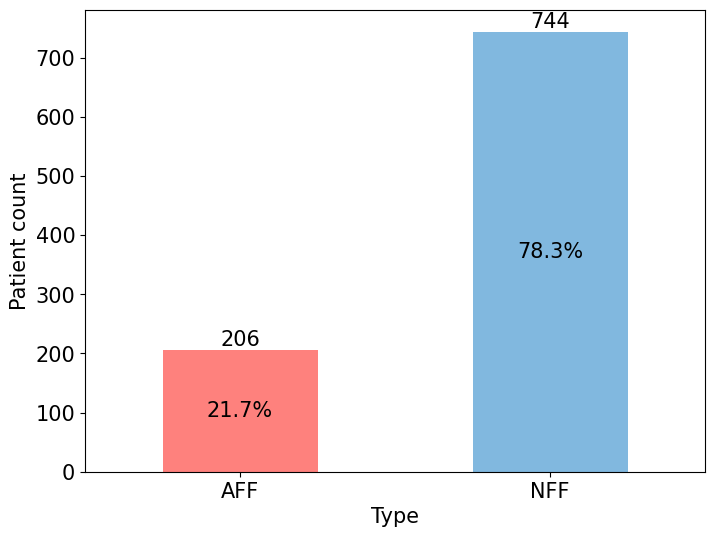

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
data = pd.read_csv(file_path)

# 过滤掉HospitalID为100的数据
filtered_data = data[data['HospitalID'] != 100]

# 根据Label分组并计算AFF和NFF的患者数量
patient_counts = filtered_data.groupby('Label')['PatientID'].nunique()

# 计算比例
patient_proportions = patient_counts / patient_counts.sum()

# 设置绘图风格
sns.set_palette("pastel")
colors = [(254/255, 129/255, 125/255), (129/255, 184/255, 223/255)]

# 绘制条形图
plt.figure(figsize=(8, 6))
ax = patient_counts.plot(kind='bar', label='Count', color=colors)
ax.set_ylabel('Patient count',fontsize=15)
ax.set_xlabel('Type',fontsize=15)
# ax.set_title('Number of Patients with AFF and NFF Labels')

# 在每个条形中间显示数量和比例
for idx, (count, proportion) in enumerate(zip(patient_counts, patient_proportions)):
    ax.annotate(f'{proportion:.1%}', (idx, count / 2), ha='center', va='center',fontsize=15)  # 显示比例
    ax.annotate(str(count), (idx, count), ha='center', va='bottom',fontsize=15)  # 显示数量

plt.xticks(rotation=0, fontsize=15)  # 使X轴标签水平显示
plt.yticks(rotation=0, fontsize=15)  # 使X轴标签水平显示

plt.show()


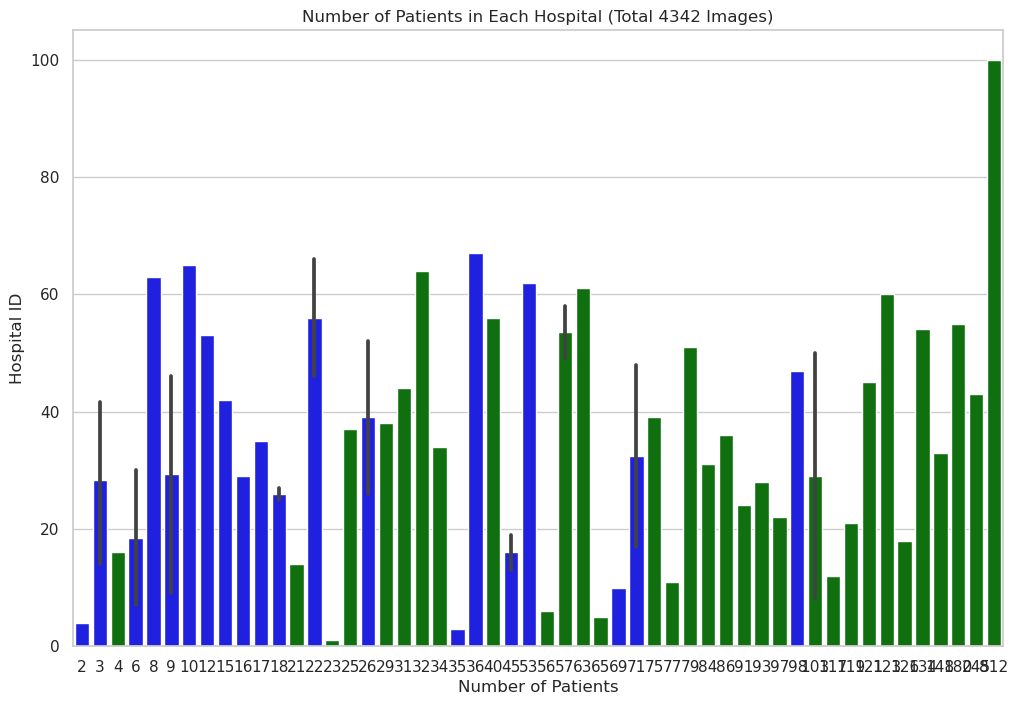

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
data = pd.read_csv(file_path)

# 统计每家医院的患者数量和AFF的数量
hospital_counts = data.groupby('HospitalID').size()
aff_counts = data[data['Label'] == 'AFF'].groupby('HospitalID').size()

# 计算总图像数量
total_images = len(data)

# 根据患者数量从少到多排列
sorted_hospitals = hospital_counts.sort_values().index

# 创建AFF和NFF的颜色列表
colors = ['green' if hospital in aff_counts.index else 'blue' for hospital in sorted_hospitals]

# 设置绘图风格
sns.set(style="whitegrid")
sns.set_palette("pastel")

# 绘制条形图，去除背景
plt.figure(figsize=(12, 8), facecolor='w', edgecolor='k')
ax = sns.barplot(x=hospital_counts[sorted_hospitals], y=sorted_hospitals, palette=colors)
ax.set_xlabel('Number of Patients')
ax.set_ylabel('Hospital ID')
ax.set_title(f'Number of Patients in Each Hospital (Total {total_images} Images)')

plt.show()


In [24]:
import pandas as pd

# 读取CSV文件
file_path = '/local/data1/honzh073/local_repo/FL/code/2_patient_level/image_data.csv'
df = pd.read_csv(file_path)

# 统计AFF和NFF的图片数量
aff_image_count = len(df[df['Label'] == 'AFF'])
nff_image_count = len(df[df['Label'] == 'NFF'])

# 计算AFF和NFF的图片数量百分比
total_images = len(df)
aff_image_percentage = (aff_image_count / total_images) * 100
nff_image_percentage = (nff_image_count / total_images) * 100

# 统计AFF和NFF的患者数量
aff_patient_count = df[df['Label'] == 'AFF']['PatientID'].nunique()
nff_patient_count = df[df['Label'] == 'NFF']['PatientID'].nunique()

# 计算AFF和NFF的患者数量百分比
total_patients = df['PatientID'].nunique()
aff_patient_percentage = (aff_patient_count / total_patients) * 100
nff_patient_percentage = (nff_patient_count / total_patients) * 100

# 打印结果
print("总图片数量:", total_images)
print("总图片数量:", total_patients)
print("AFF图片数量:", aff_image_count, "，百分比:", aff_image_percentage, "%")
print("NFF图片数量:", nff_image_count, "，百分比:", nff_image_percentage, "%")
print("AFF患者数量:", aff_patient_count, "，百分比:", aff_patient_percentage, "%")
print("NFF患者数量:", nff_patient_count, "，百分比:", nff_patient_percentage, "%")


总图片数量: 4342
总图片数量: 1163
AFF图片数量: 868 ，百分比: 19.990787655458313 %
NFF图片数量: 3474 ，百分比: 80.0092123445417 %
AFF患者数量: 247 ，百分比: 21.238177128116938 %
NFF患者数量: 916 ，百分比: 78.76182287188306 %


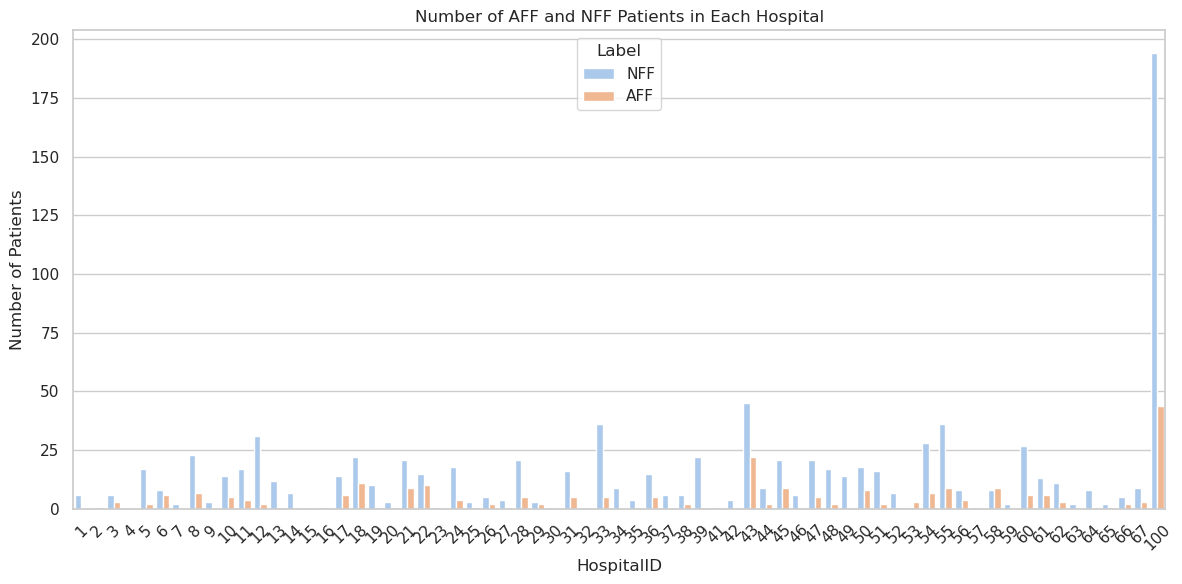

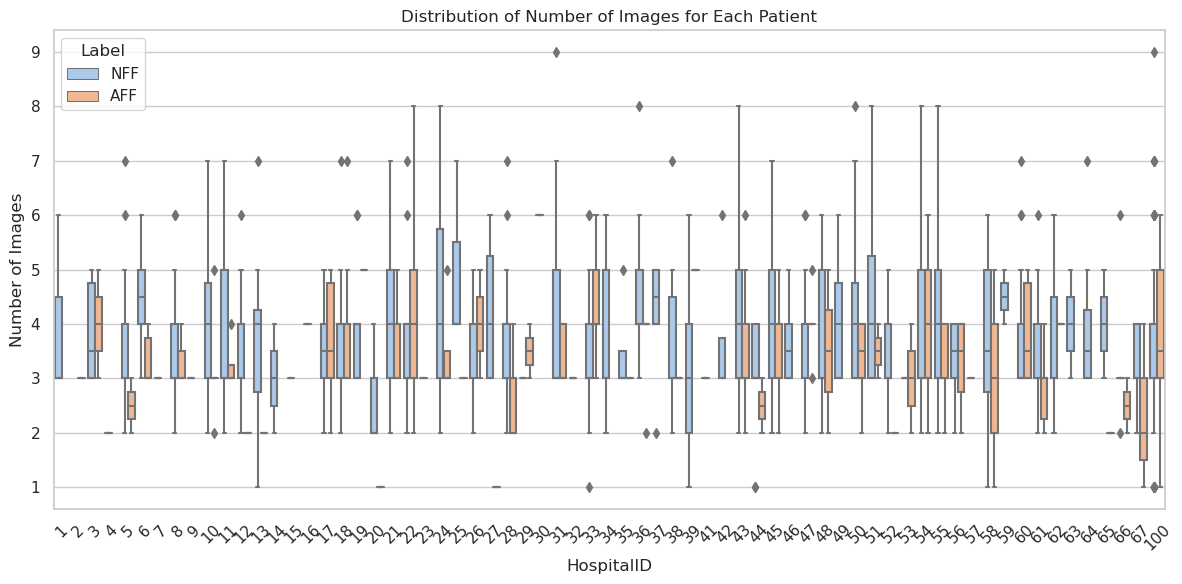

  Label   ImageID
0   AFF  3.233368
1   NFF  3.689469


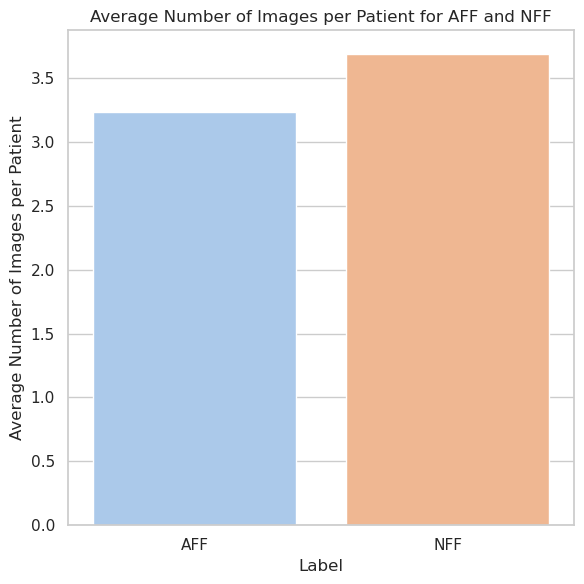

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
file_path = '/local/data1/honzh073/local_repo/FL/code/2_patient_level/image_data.csv'
df = pd.read_csv(file_path)

# 统计每个医院的AFF和NFF患者数量
hospital_counts = df.groupby(['HospitalID', 'Label'])['PatientID'].nunique().reset_index()

# 绘制每个医院的AFF和NFF患者数量柱状图
plt.figure(figsize=(12, 6))
sns.barplot(x='HospitalID', y='PatientID', hue='Label', data=hospital_counts)
plt.xlabel('HospitalID')
plt.ylabel('Number of Patients')
plt.title('Number of AFF and NFF Patients in Each Hospital')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.tight_layout()
plt.show()

# 统计每位患者的图片数量
patient_image_counts = df.groupby(['HospitalID', 'PatientID', 'Label'])['ImageID'].count().reset_index()

# 绘制每位患者的图片数量箱线图
plt.figure(figsize=(12, 6))
sns.boxplot(x='HospitalID', y='ImageID', hue='Label', data=patient_image_counts)
plt.xlabel('HospitalID')
plt.ylabel('Number of Images')
plt.title('Distribution of Number of Images for Each Patient')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.tight_layout()
plt.show()

# 计算每位患者的平均图片数量
average_image_counts = df.groupby(['HospitalID', 'PatientID', 'Label'])['ImageID'].count().groupby(['HospitalID', 'Label']).mean().reset_index()

# 计算不同医院的AFF和NFF患者平均图片数量
average_image_counts_by_hospital = average_image_counts.groupby('Label')['ImageID'].mean().reset_index()
print(average_image_counts_by_hospital)
# 绘制不同医院的AFF和NFF患者平均图片数量柱状图
plt.figure(figsize=(6, 6))
sns.barplot(x='Label', y='ImageID', data=average_image_counts_by_hospital)
plt.xlabel('Label')
plt.ylabel('Average Number of Images per Patient')
plt.title('Average Number of Images per Patient for AFF and NFF')
plt.tight_layout()
plt.show()


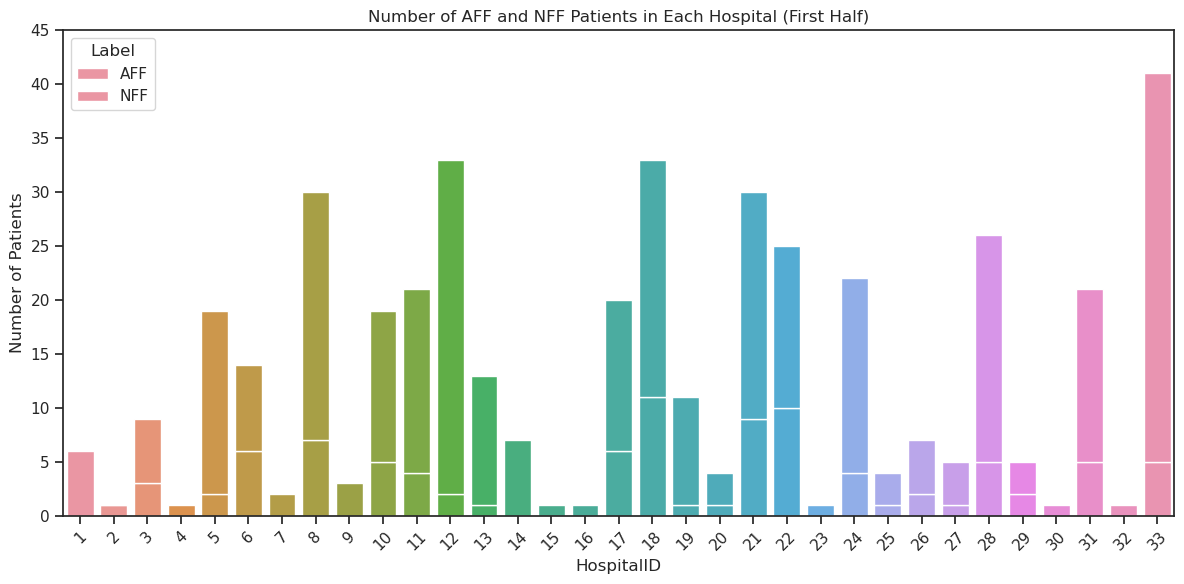

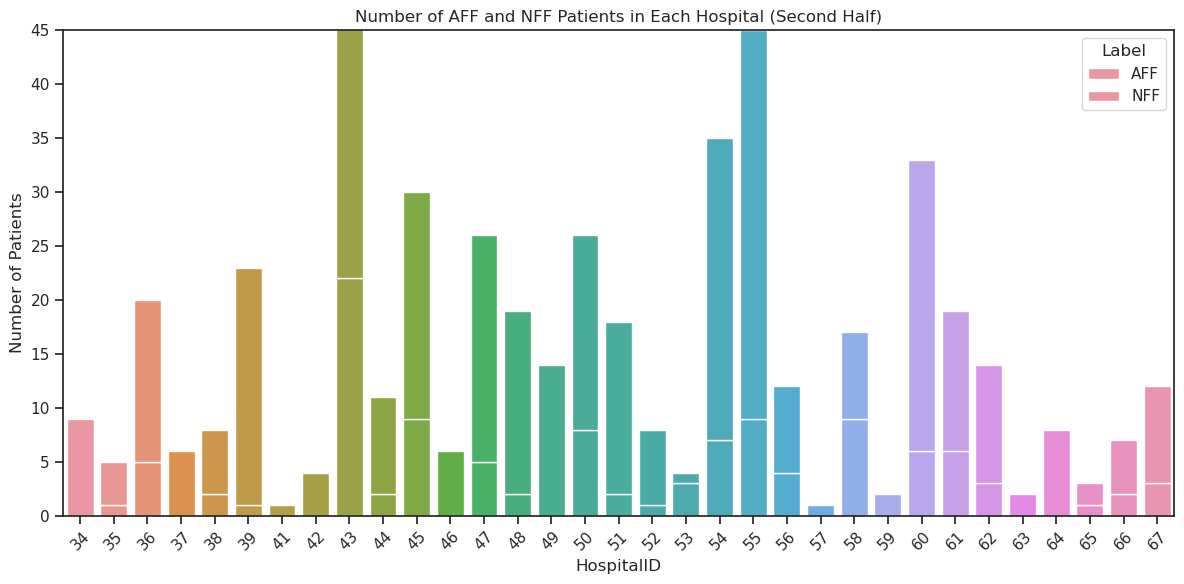

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件并过滤掉HospitalID为100的数据
file_path = '/local/data1/honzh073/local_repo/FL/code/2_patient_level/image_data.csv'
df = pd.read_csv(file_path)
df = df[df['HospitalID'] != 100]  # 过滤掉HospitalID为100的数据

# 统计每个医院的AFF和NFF患者数量
hospital_counts = df.groupby(['HospitalID', 'Label'])['PatientID'].nunique().reset_index()

# 使用pivot函数将数据透视，确保不存在AFF或者NFF图片的医院显示为0
hospital_counts_pivot = hospital_counts.pivot(index='HospitalID', columns='Label', values='PatientID').reset_index()
hospital_counts_pivot = hospital_counts_pivot.fillna(0)  # 将NaN值填充为0

# 将医院按照ID排序并分成两组
sorted_hospitals = hospital_counts_pivot['HospitalID'].unique()
first_half_hospitals = sorted_hospitals[:len(sorted_hospitals)//2]
second_half_hospitals = sorted_hospitals[len(sorted_hospitals)//2:]

# 创建第一个子图，显示第一组医院的AFF和NFF患者数量柱状图
plt.figure(figsize=(12, 6))
sns.barplot(x='HospitalID', y='AFF', data=hospital_counts_pivot[hospital_counts_pivot['HospitalID'].isin(first_half_hospitals)], label='AFF')
sns.barplot(x='HospitalID', y='NFF', data=hospital_counts_pivot[hospital_counts_pivot['HospitalID'].isin(first_half_hospitals)], label='NFF', bottom=hospital_counts_pivot[hospital_counts_pivot['HospitalID'].isin(first_half_hospitals)]['AFF'])
plt.xlabel('HospitalID')
plt.ylabel('Number of Patients')
plt.title('Number of AFF and NFF Patients in Each Hospital (First Half)')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.tight_layout()

# 设置第一个子图的Y轴刻度范围
plt.ylim(0, max(hospital_counts_pivot[['AFF', 'NFF']].values.max(axis=1)))

plt.show()

# 创建第二个子图，显示第二组医院的AFF和NFF患者数量柱状图
plt.figure(figsize=(12, 6))
sns.barplot(x='HospitalID', y='AFF', data=hospital_counts_pivot[hospital_counts_pivot['HospitalID'].isin(second_half_hospitals)], label='AFF')
sns.barplot(x='HospitalID', y='NFF', data=hospital_counts_pivot[hospital_counts_pivot['HospitalID'].isin(second_half_hospitals)], label='NFF', bottom=hospital_counts_pivot[hospital_counts_pivot['HospitalID'].isin(second_half_hospitals)]['AFF'])
plt.xlabel('HospitalID')
plt.ylabel('Number of Patients')
plt.title('Number of AFF and NFF Patients in Each Hospital (Second Half)')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.tight_layout()

# 设置第二个子图的Y轴刻度范围
plt.ylim(0, max(hospital_counts_pivot[['AFF', 'NFF']].values.max(axis=1)))

plt.show()


In [5]:
import pandas as pd

# 读取CSV文件
file_path = '/local/data1/honzh073/local_repo/FL/code/2_patient_level/image_data.csv'
data = pd.read_csv(file_path)

# 过滤掉HospitalID为100的数据
filtered_data = data[data['HospitalID'] != 100]

# 按PatientID分组并计算每个患者的图片数量
patient_image_counts = filtered_data.groupby('PatientID').size()

# 计算中位数、平均数、最大值、最小值和方差
median_count = patient_image_counts.median()
mean_count = patient_image_counts.mean()
max_count = patient_image_counts.max()
min_count = patient_image_counts.min()
variance = patient_image_counts.var()

# 生成包含统计信息的表格
statistics_table = pd.DataFrame({
    'Statistic': ['Median', 'Mean', 'Maximum', 'Minimum', 'Variance'],
    'Value': [median_count, mean_count, max_count, min_count, variance]
})

print(statistics_table)


  Statistic     Value
0    Median  3.000000
1      Mean  3.715789
2   Maximum  9.000000
3   Minimum  1.000000
4  Variance  1.609339


In [ ]:
# hospital 43

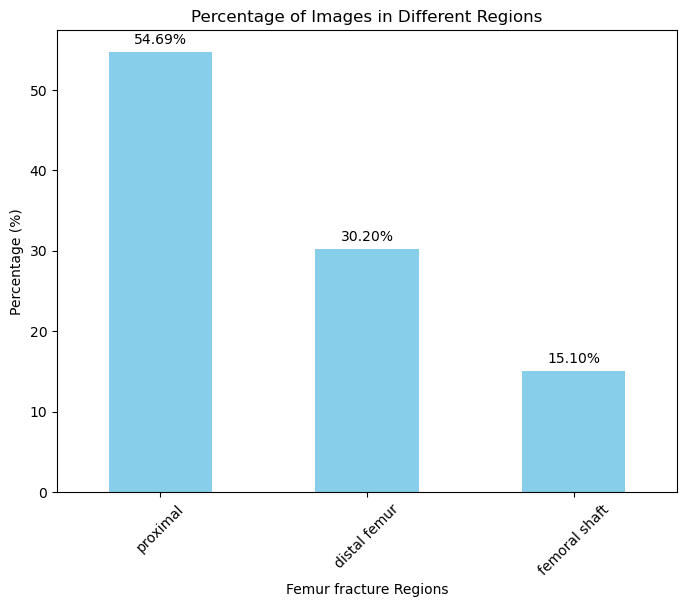

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# 假设你的图片区域数据列表
image_regions = ['proximal'] * 134 + ['femoral shaft'] * 37 + ['distal femur'] * 74

# 计算每个区域的图片数量
region_counts = pd.Series(image_regions).value_counts()

# 计算百分比
total_images = len(image_regions)
region_percentages = (region_counts / total_images) * 100

# 绘制柱状图
plt.figure(figsize=(8, 6))
region_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Images in Different Regions')
plt.xlabel('Femur fracture Regions')
plt.ylabel('Percentage (%)')

# 显示百分比标签
for i, v in enumerate(region_percentages):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center')

plt.xticks(rotation=45)
plt.show()


In [41]:
import os
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy  # 确保导入了scipy库

# 定义函数来计算图片的像素、亮度和对比度
def calculate_image_properties(image):
    # 将图像转换为NumPy数组
    image_array = np.array(image)
    
    # 计算图像的像素、亮度和对比度
    pixels = np.prod(image_array.shape)
    brightness = np.mean(image_array)
    contrast = image_array.std()
    
    return pixels, brightness, contrast

# 定义函数来处理文件夹中的所有图像
def process_images(folder_path):
    # 初始化存储结果的列表
    widths, heights, pixel_counts, brightness_values, contrast_values = [], [], [], [], []
    
    # 遍历文件夹中的所有图像
    for filename in os.listdir(folder_path):
        # 生成完整的文件路径
        file_path = os.path.join(folder_path, filename)
        
        # 打开图像
        image = Image.open(file_path)
        
        # 获取图像的宽度和高度
        width, height = image.size
        widths.append(width)
        heights.append(height)
        
        # 计算图像的像素、亮度和对比度
        pixels, brightness, contrast = calculate_image_properties(image)
        pixel_counts.append(pixels)
        brightness_values.append(brightness)
        contrast_values.append(contrast)
    
    # 计算宽度、高度、数量、亮度和对比度的平均值、标准差和偏度
    width_mean, width_std, width_skewness = np.mean(widths), np.std(widths), scipy.stats.skew(widths)
    height_mean, height_std, height_skewness = np.mean(heights), np.std(heights), scipy.stats.skew(heights)
    pixel_mean, pixel_std, pixel_skewness = np.mean(pixel_counts), np.std(pixel_counts), scipy.stats.skew(pixel_counts)
    brightness_mean, brightness_std, brightness_skewness = np.mean(brightness_values), np.std(brightness_values), scipy.stats.skew(brightness_values)
    contrast_mean, contrast_std, contrast_skewness = np.mean(contrast_values), np.std(contrast_values), scipy.stats.skew(contrast_values)
    
    # 返回计算结果
    return (width_mean, width_std, width_skewness), (height_mean, height_std, height_skewness), (pixel_mean, pixel_std, pixel_skewness), (brightness_mean, brightness_std, brightness_skewness), (contrast_mean, contrast_std, contrast_skewness)

# 指定文件夹路径
folder_path = '/local/data1/honzh073/data/8bit_raw'

# 处理图像并获取统计信息
width_stats, height_stats, pixel_stats, brightness_stats, contrast_stats = process_images(folder_path)

# 打印结果
print("宽度统计信息 (平均值, 标准差, 偏度):", width_stats)
print("高度统计信息 (平均值, 标准差, 偏度):", height_stats)
print("像素数量统计信息 (平均值, 标准差, 偏度):", pixel_stats)
print("亮度统计信息 (平均值, 标准差, 偏度):", brightness_stats)
print("对比度统计信息 (平均值, 标准差, 偏度):", contrast_stats)




宽度统计信息 (平均值, 标准差, 偏度): (2205.1427913403963, 625.0274428741335, 0.10201873121306015)
高度统计信息 (平均值, 标准差, 偏度): (2721.333947489636, 429.0836705767638, 0.22697427507589255)
像素数量统计信息 (平均值, 标准差, 偏度): (6090662.42860433, 2305397.395951394, 0.9255945732385172)
亮度统计信息 (平均值, 标准差, 偏度): (72.76635668492636, 28.468405588878927, 0.27038716563517934)
对比度统计信息 (平均值, 标准差, 偏度): (46.961547387447055, 12.137622294551806, 0.17274469012846913)


In [43]:
import pandas as pd

# 定义统计信息
statistics = {
    '属性': ['宽度', '高度', '像素数量', '亮度', '对比度'],
    '平均值': [2205.1427913403963, 2721.333947489636, 6090662.42860433, 72.76635668492636, 46.961547387447055],
    '标准差': [625.0274428741335, 429.0836705767638, 2305397.395951394, 28.468405588878927, 12.137622294551806],
    '偏度': [0.10201873121306015, 0.22697427507589255, 0.9255945732385172, 0.27038716563517934, 0.17274469012846913]
}

# 创建DataFrame
df = pd.DataFrame(statistics)

# 输出DataFrame为表格
print(df)


     属性           平均值           标准差        偏度
0    宽度  2.205143e+03  6.250274e+02  0.102019
1    高度  2.721334e+03  4.290837e+02  0.226974
2  像素数量  6.090662e+06  2.305397e+06  0.925595
3    亮度  7.276636e+01  2.846841e+01  0.270387
4   对比度  4.696155e+01  1.213762e+01  0.172745


# 统计不同医院的X-ray图片数据，根据X-ray的图片信息，找出数据分布相似的一些医院，为后续的group分组提供帮助：

# 读取8bit图片的信息，存储到CSV文件

In [63]:
from PIL import Image
import pandas as pd
import os

# 定义存储图片信息的空列表
image_info = []

# 遍历文件夹中的所有图片文件
image_folder = '/local/data1/honzh073/data/8bit_raw'
for filename in os.listdir(image_folder):
    if filename.endswith('.png'):  # 确保只处理PNG格式的图片文件
        # 读取图片
        image_path = os.path.join(image_folder, filename)
        image = Image.open(image_path)

        # 提取图片信息（长度、宽度、亮度、图片对比度）
        width, height = image.size
        brightness = image.convert('L').getextrema()[1]  # 获取亮度（灰度范围中的最大值）
        contrast = image.getextrema()[0]  # 获取图片对比度（灰度范围中的最小值）

        # 将图片信息添加到列表中
        image_info.append({'Filename': filename, 'Width': width, 'Height': height, 'Brightness': brightness, 'Contrast': contrast})

# 将图片信息列表转换为DataFrame
image_df = pd.DataFrame(image_info)

# 将DataFrame保存为CSV文件
output_csv = '/local/data1/honzh073/data/image_info.csv'
image_df.to_csv(output_csv, index=False)

print(f"Image information saved to {output_csv}")


Image information saved to /local/data1/honzh073/data/image_info.csv
